In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False 

In [2]:
df = pd.read_csv('./datasets/last_elec.csv')
df.drop('합계 일사량', axis=1, inplace=True)

In [3]:
df

,시도,시군구,계약종별,년도,월,전력 사용량,확진자,평균기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,일조율
0,서울특별시,종로구,주택용,2015,1,2.414819e+07,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
1,서울특별시,종로구,일반용,2015,1,1.181337e+08,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
2,서울특별시,종로구,교육용,2015,1,9.619909e+06,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
3,서울특별시,종로구,산업용,2015,1,6.580369e+06,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
4,서울특별시,종로구,농사용,2015,1,2.848000e+03,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43916,울산광역시,울주군,교육용,2022,1,9.139668e+06,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43917,울산광역시,울주군,산업용,2022,1,1.030417e+09,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43918,울산광역시,울주군,농사용,2022,1,6.842901e+06,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43919,울산광역시,울주군,가로등,2022,1,2.703994e+06,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34


In [4]:
# 가로등(streetlight)
sl = df.copy()

In [5]:
sl.시도.unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시'],
      dtype=object)

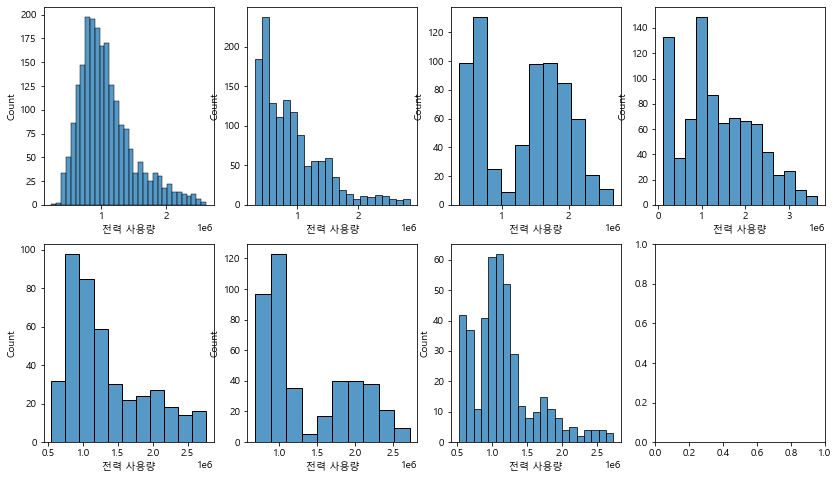

In [6]:
# 시도별 가로등
import seaborn as sns

fig , axs = plt.subplots(figsize=(14,8), nrows=2, ncols=4)

sido = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시']
for i in range(len(sido)):
    row = i// 4
    col = i % 4
    sns.histplot(sl[(sl['시도']==sido[i])&(sl['계약종별']=='가로등')]['전력 사용량'], ax = axs[row][col])
#     plt.title(sido[i] +' '+ '가로등', ax=axs[row][col])

In [7]:
sl = sl[(sl['계약종별']=='가로등')]
sl

,시도,시군구,계약종별,년도,월,전력 사용량,확진자,평균기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,일조율
5,서울특별시,종로구,가로등,2015,1,1146090.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
11,서울특별시,중구,가로등,2015,1,1725615.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
18,서울특별시,용산구,가로등,2015,1,1500780.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
25,서울특별시,성동구,가로등,2015,1,1267279.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
32,서울특별시,동대문구,가로등,2015,1,1216158.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43891,울산광역시,북구,가로등,2022,1,1497624.0,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43898,울산광역시,동구,가로등,2022,1,790738.0,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43905,울산광역시,중구,가로등,2022,1,1286843.0,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43912,울산광역시,남구,가로등,2022,1,1397869.0,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34


In [8]:
# 가로등 2022년 데이터 삭제
drop = sl[sl['년도']==2022].index
sl2 = sl.drop(drop)
sl2

,시도,시군구,계약종별,년도,월,전력 사용량,확진자,평균기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,일조율
5,서울특별시,종로구,가로등,2015,1,1146090.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
11,서울특별시,중구,가로등,2015,1,1725615.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
18,서울특별시,용산구,가로등,2015,1,1500780.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
25,서울특별시,성동구,가로등,2015,1,1267279.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
32,서울특별시,동대문구,가로등,2015,1,1216158.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43374,울산광역시,북구,가로등,2021,12,1448701.0,1233.0,4.7,1012.9,49,3.5,2.3,230.4,75.64
43381,울산광역시,동구,가로등,2021,12,768695.0,1233.0,4.7,1012.9,49,3.5,2.3,230.4,75.64
43388,울산광역시,중구,가로등,2021,12,1238139.0,1233.0,4.7,1012.9,49,3.5,2.3,230.4,75.64
43395,울산광역시,남구,가로등,2021,12,1357616.0,1233.0,4.7,1012.9,49,3.5,2.3,230.4,75.64


In [9]:
sl['전력 사용량'].sum()

7236137576.0

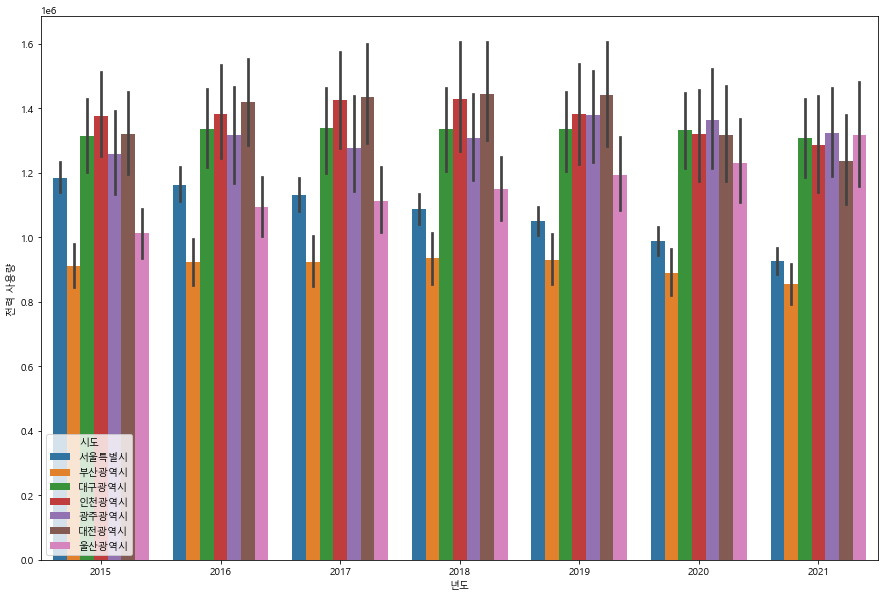

In [10]:
plt.figure(figsize=(15, 10))

splot = sns.barplot(data=sl2, x='년도', y='전력 사용량', hue='시도')
# plt.title('연도에 따른 시도별 가로등', fontsize=25)
plt.show()
sfig = splot.get_figure()
sfig.savefig('연도에 따른 시도별 가로등.png')

In [11]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')


In [12]:
outlier_iqr(sl, '전력 사용량')

IQR은 733574.0 이다.
lower bound 값은 -359244.5 이다.
upper bound 값은 2575051.5 이다.
총 이상치 개수는 123 이다.


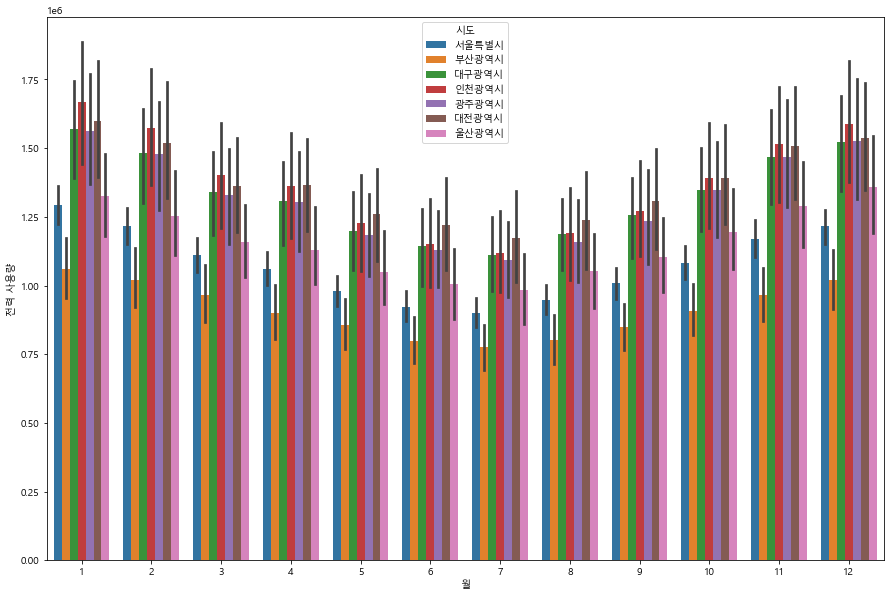

In [13]:
plt.figure(figsize=(15, 10))

splot = sns.barplot(data=sl2, x='월', y='전력 사용량', hue='시도')
# plt.title('월에 따른 시도별 가로등', fontsize=25)
plt.show()
sfig = splot.get_figure()
sfig.savefig('월에 따른 시도별 가로등.png')

부산광역시가 모든연도와 달에서 가로등 전력소비량이 가장 적고 인천광역시가 모든 달에서 평균 전력 사용량이 가장 높다.
여름에는 밤이 짧고 겨울에는 밤이 길기 때문에 계절성을 월단위 그래프에서 볼 수 있다.

In [14]:
# 코로나 이전
co_b = sl[(sl['년도']<2020)]
co_b

,시도,시군구,계약종별,년도,월,전력 사용량,확진자,평균기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,일조율
5,서울특별시,종로구,가로등,2015,1,1146090.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
11,서울특별시,중구,가로등,2015,1,1725615.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
18,서울특별시,용산구,가로등,2015,1,1500780.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
25,서울특별시,성동구,가로등,2015,1,1267279.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
32,서울특별시,동대문구,가로등,2015,1,1216158.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30978,울산광역시,북구,가로등,2019,12,1371889.0,0.0,5.4,1013.6,54,40.8,2.1,202.5,66.46
30985,울산광역시,동구,가로등,2019,12,745265.0,0.0,5.4,1013.6,54,40.8,2.1,202.5,66.46
30992,울산광역시,중구,가로등,2019,12,1313580.0,0.0,5.4,1013.6,54,40.8,2.1,202.5,66.46
30999,울산광역시,남구,가로등,2019,12,1237149.0,0.0,5.4,1013.6,54,40.8,2.1,202.5,66.46


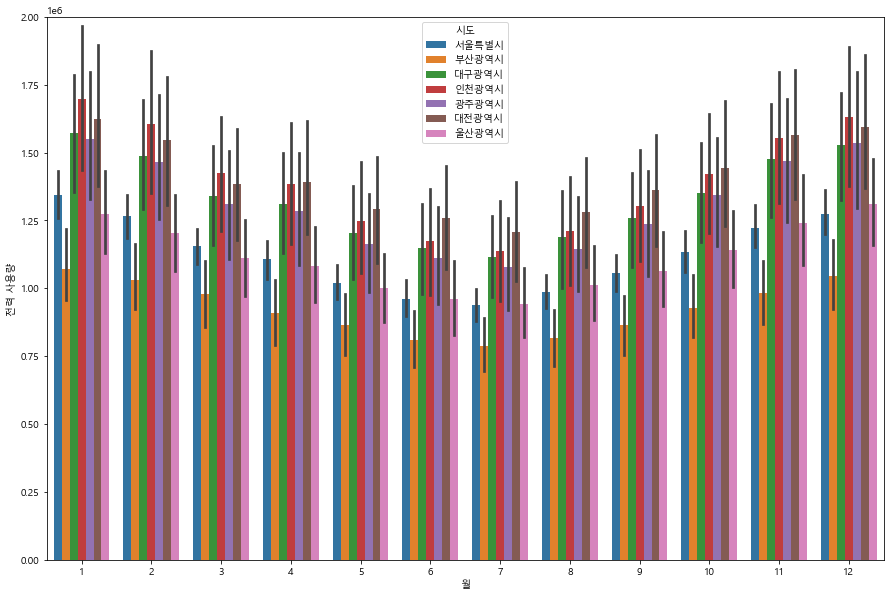

In [15]:
plt.figure(figsize=(15, 10))

splot = sns.barplot(data=co_b, x='월', y='전력 사용량', hue='시도')
# plt.title('코로나 이전 월에 따른 시도별 가로등', fontsize=25)
plt.ylim(0, 2e6)
plt.show()
sfig = splot.get_figure()
sfig.savefig('코로나 이전 월에 따른 시도별 가로등.png')

In [16]:
# 코로나 이후
co_a = sl[(sl['년도']>2019)]
co_a

,시도,시군구,계약종별,년도,월,전력 사용량,확진자,평균기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,일조율
31013,서울특별시,종로구,가로등,2020,1,918968.0,7.0,1.6,1012.8,56,60.5,2.1,177.9,57.93
31019,서울특별시,중구,가로등,2020,1,1071213.0,7.0,1.6,1012.8,56,60.5,2.1,177.9,57.93
31025,서울특별시,용산구,가로등,2020,1,1280201.0,7.0,1.6,1012.8,56,60.5,2.1,177.9,57.93
31032,서울특별시,성동구,가로등,2020,1,1063996.0,7.0,1.6,1012.8,56,60.5,2.1,177.9,57.93
31039,서울특별시,동대문구,가로등,2020,1,1022115.0,7.0,1.6,1012.8,56,60.5,2.1,177.9,57.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43891,울산광역시,북구,가로등,2022,1,1497624.0,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43898,울산광역시,동구,가로등,2022,1,790738.0,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43905,울산광역시,중구,가로등,2022,1,1286843.0,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43912,울산광역시,남구,가로등,2022,1,1397869.0,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34


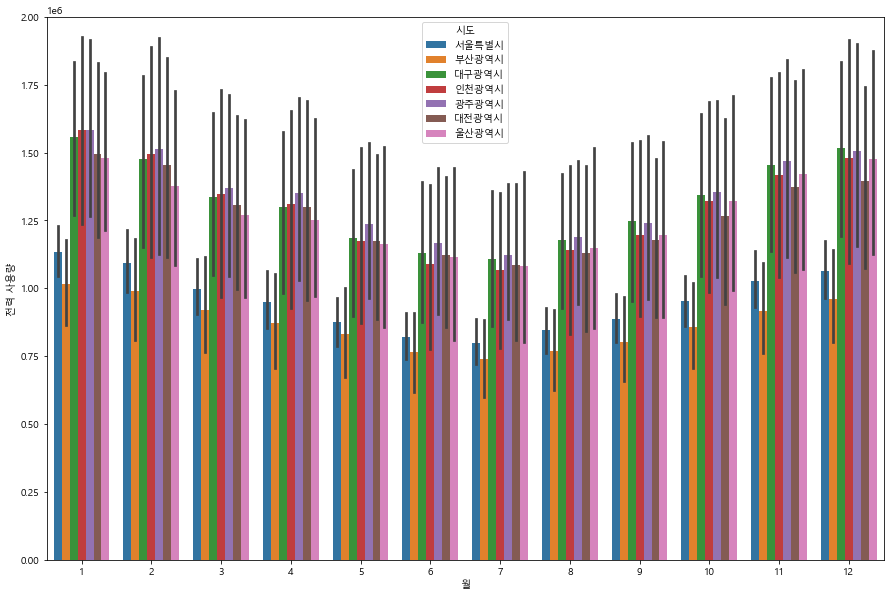

In [17]:
plt.figure(figsize=(15, 10))

splot = sns.barplot(data=co_a, x='월', y='전력 사용량', hue='시도')
# plt.title('코로나 이후 월에 따른 시도별 가로등', fontsize=25)
plt.ylim(0, 2e6)
plt.show()
sfig = splot.get_figure()
sfig.savefig('코로나 이후 월에 따른 시도별 가로등.png')

https://home.kepco.co.kr/kepco/CY/K/htmlView/CYKDPP00101.do?menuCd=FN02070401

**심야전력 정의**

특정 시간대에 집중되는 전력 수요를 분산하고, 전기 사용이 적은 심야(밤 11시~아침 9시) 시간대 수요를 증대시켜 전력설비를 효율적으로 이용하기 위하여 심야시간대에 전기를 공급받아 열, 온수 또는 얼음을 생산하거나 전기를 ESS에 저장하였다가 급탕, 난방 또는 냉방에 이용하거나 ESS와 연결된 EHP(전기히트펌프)를 가동하는 심야전력기기에 대하여 별도의 전기요금을 적용하는 제도입니다.


**심야전력기기란**

축열식 난방·온수기기, 축열식 냉난방설비(축냉설비), ESS식 냉난방설비를 말합니다.


**심야전력요금은**

심야시간에 사용한 모든 전력량에 대하여 적용하는 요금이 아니라, 심야전력 기기의 심야시간 사용전력량에 대해서만 적용하는 요금제도입니다.
심야전력 계량기(타임스위치 포함)를 따로 설치하여 사용량을 검침한 후 일반요금과 별도로 요금이 청구됩니다.

---
2018년 6월 진행한 첫 기자간담회에서는 “2017년 경부하 요금으로 쓴 전기는 전체 전력 사용의 49%에 이르고 특히 대기업들이 심야시간 전기의 53%를 쓰고 있다”

In [18]:
night = df.copy()

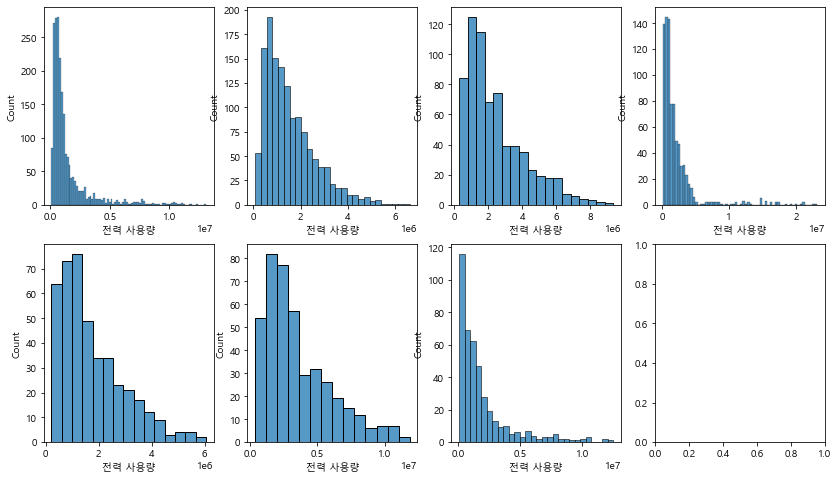

In [19]:
# 시도별 심야
import seaborn as sns

fig , axs = plt.subplots(figsize=(14,8), nrows=2, ncols=4)

sido = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시']
for i in range(len(sido)):
    row = i// 4
    col = i % 4
    sns.histplot(night[(night['시도']==sido[i])&(night['계약종별']=='심 야')]['전력 사용량'], ax = axs[row][col])
#     plt.title(sido[i] +' '+ '가로등', ax=axs[row][col])

In [20]:
dn = night[(night['계약종별']=='심 야')]
dn

,시도,시군구,계약종별,년도,월,전력 사용량,확진자,평균기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,일조율
6,서울특별시,종로구,심 야,2015,1,4822017.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
12,서울특별시,중구,심 야,2015,1,1197573.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
19,서울특별시,용산구,심 야,2015,1,989022.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
26,서울특별시,성동구,심 야,2015,1,813210.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
33,서울특별시,동대문구,심 야,2015,1,1307186.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43892,울산광역시,북구,심 야,2022,1,1321124.0,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43899,울산광역시,동구,심 야,2022,1,627804.0,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43906,울산광역시,중구,심 야,2022,1,963254.0,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34
43913,울산광역시,남구,심 야,2022,1,2863046.0,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34


In [21]:
# 심야 2022년 데이터 삭제
drop = dn[dn['년도']==2022].index
dn2 = dn.drop(drop)
dn2

,시도,시군구,계약종별,년도,월,전력 사용량,확진자,평균기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,일조율
6,서울특별시,종로구,심 야,2015,1,4822017.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
12,서울특별시,중구,심 야,2015,1,1197573.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
19,서울특별시,용산구,심 야,2015,1,989022.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
26,서울특별시,성동구,심 야,2015,1,813210.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
33,서울특별시,동대문구,심 야,2015,1,1307186.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43375,울산광역시,북구,심 야,2021,12,1007522.0,1233.0,4.7,1012.9,49,3.5,2.3,230.4,75.64
43382,울산광역시,동구,심 야,2021,12,423041.0,1233.0,4.7,1012.9,49,3.5,2.3,230.4,75.64
43389,울산광역시,중구,심 야,2021,12,710416.0,1233.0,4.7,1012.9,49,3.5,2.3,230.4,75.64
43396,울산광역시,남구,심 야,2021,12,2141584.0,1233.0,4.7,1012.9,49,3.5,2.3,230.4,75.64


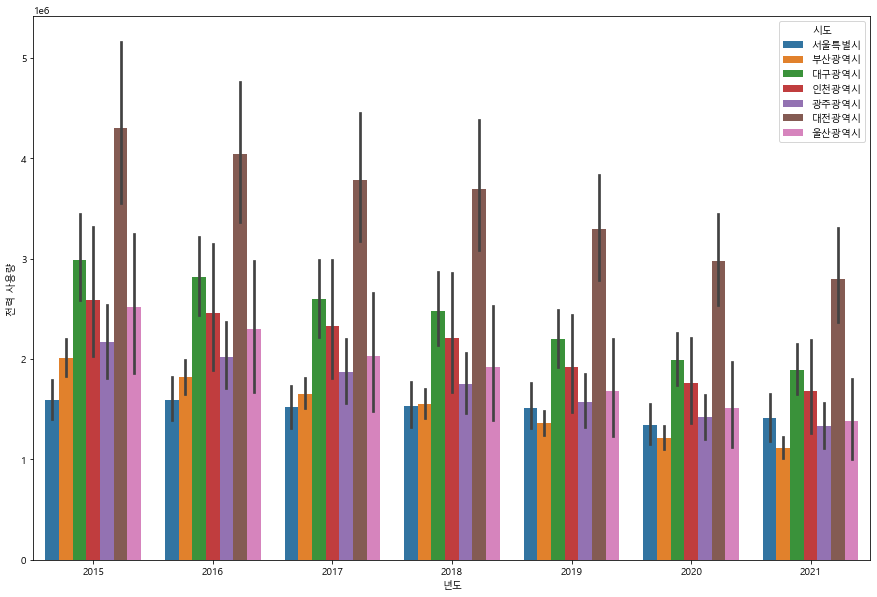

In [22]:
plt.figure(figsize=(15, 10))

splot = sns.barplot(data=dn2, x='년도', y='전력 사용량', hue='시도')
# plt.title('연도에 따른 시도별 심야', fontsize=25)
plt.show()
sfig = splot.get_figure()
sfig.savefig('연도에 따른 시도별 심야.png')

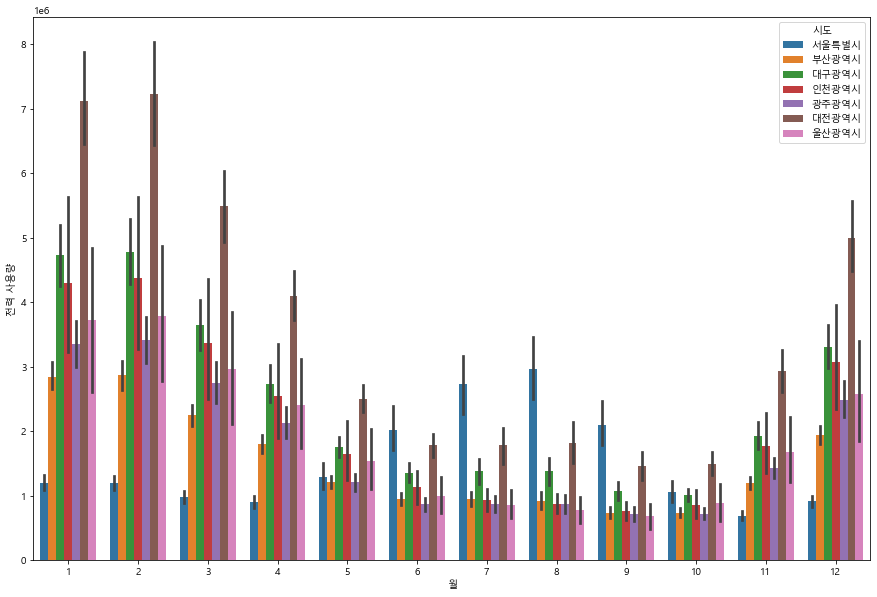

In [23]:
plt.figure(figsize=(15, 10))
splot = sns.barplot(data=dn2, x='월', y='전력 사용량', hue='시도')
# plt.title('월에 따른 시도별 심야', fontsize=25)
plt.show()
sfig = splot.get_figure()
sfig.savefig('월에 따른 시도별 심야.png')

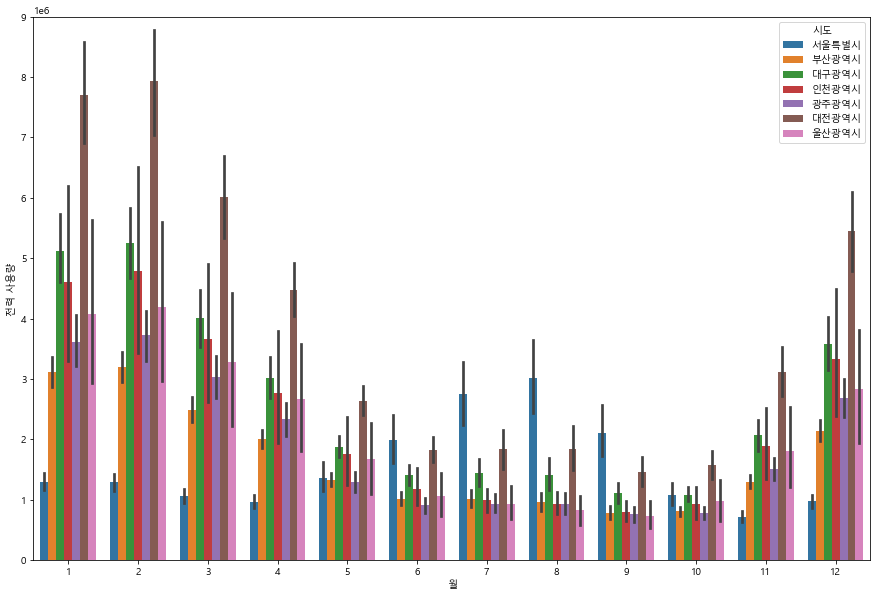

In [24]:
# 코로나 이전 심야 전기
dn_b = dn[(dn['년도']<2020)]
plt.figure(figsize=(15, 10))
splot = sns.barplot(data=dn_b, x='월', y='전력 사용량', hue='시도')
# plt.title('코로나 이전 월에 따른 시도별 심야', fontsize=25)
plt.ylim(0, 9e6)
plt.show()
sfig = splot.get_figure()
sfig.savefig('코로나 이전 월에 따른 시도별 심야.png')

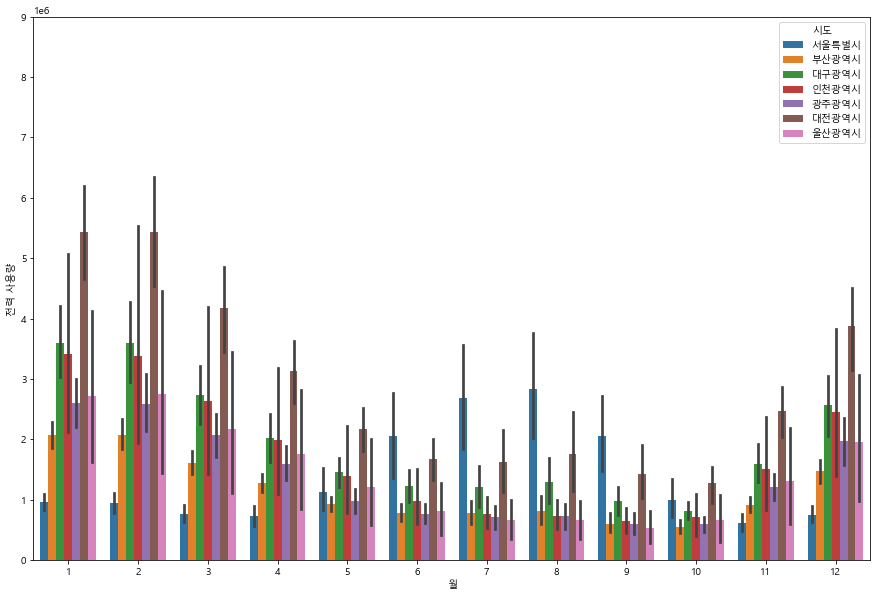

In [25]:
# 코로나 이후 심야 전기
dn_a = dn[(dn['년도']>2019)]
plt.figure(figsize=(15, 10))
splot = sns.barplot(data=dn_a, x='월', y='전력 사용량', hue='시도')
# plt.title('코로나 이후 월에 따른 시도별 심야', fontsize=25)
plt.ylim(0, 9e6)
plt.show()
sfig = splot.get_figure()
sfig.savefig('코로나 이후 월에 따른 시도별 심야.png')

In [26]:
outlier_iqr(dn, '전력 사용량')

IQR은 1677173.5 이다.
lower bound 값은 -1868907.25 이다.
upper bound 값은 4839786.75 이다.
총 이상치 개수는 441 이다.


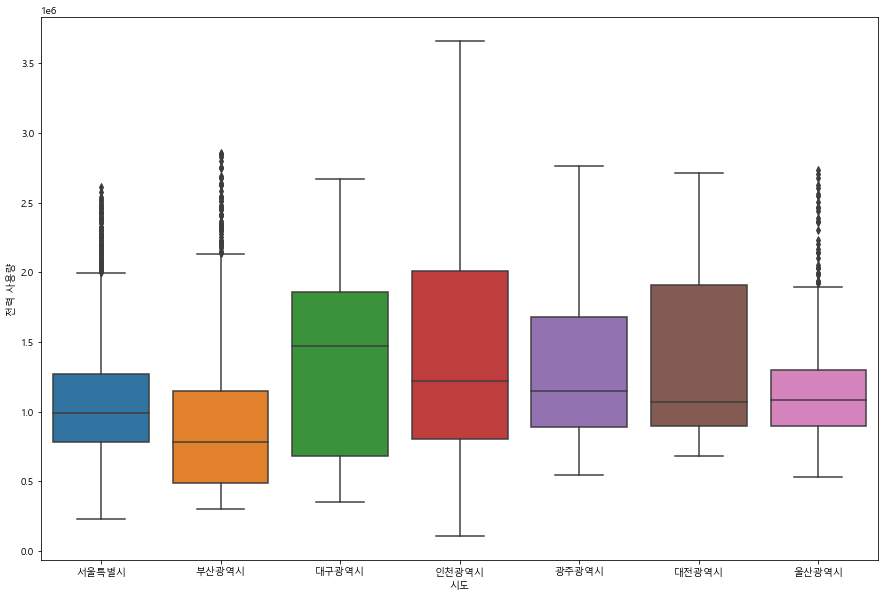

In [27]:
# 시도별 가로등 전력 사용량 박스 플롯
plt.figure(figsize=(15, 10))
splot = sns.boxplot(x="시도", y="전력 사용량", data=sl)
# plt.title('시도별 가로등 전력 사용량', fontsize=25)
sfig = splot.get_figure()
sfig.savefig('시도별 가로등 전력 사용량.png')

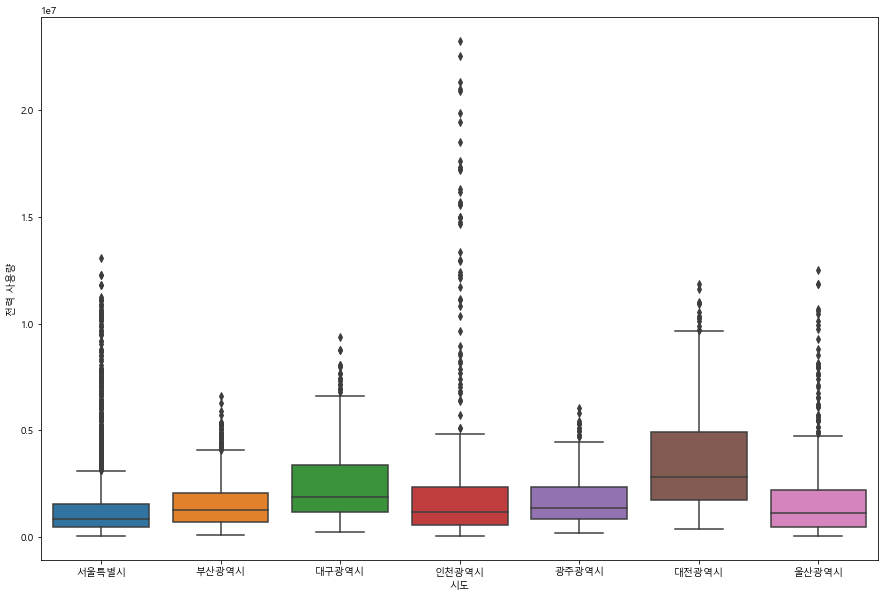

In [28]:
# 시도별 심야 전력 사용량 박스 플롯
plt.figure(figsize=(15, 10))
splot = sns.boxplot(x="시도", y="전력 사용량", data=dn)
# plt.title('시도별 심야 전력 사용량', fontsize=25)
sfig = splot.get_figure()
sfig.savefig('시도별 심야 전력 사용량.png')

In [29]:
dn_20 = dn[(dn['년도']==2020)]
dn_20

,시도,시군구,계약종별,년도,월,전력 사용량,확진자,평균기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,일조율
31014,서울특별시,종로구,심 야,2020,1,2962411.0,7.0,1.6,1012.8,56,60.5,2.1,177.9,57.93
31020,서울특별시,중구,심 야,2020,1,643132.0,7.0,1.6,1012.8,56,60.5,2.1,177.9,57.93
31026,서울특별시,용산구,심 야,2020,1,782097.0,7.0,1.6,1012.8,56,60.5,2.1,177.9,57.93
31033,서울특별시,성동구,심 야,2020,1,462297.0,7.0,1.6,1012.8,56,60.5,2.1,177.9,57.93
31040,서울특별시,동대문구,심 야,2020,1,637287.0,7.0,1.6,1012.8,56,60.5,2.1,177.9,57.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37171,울산광역시,북구,심 야,2020,12,1132712.0,475.0,3.4,1014.1,47,5.7,2.4,236.0,77.53
37178,울산광역시,동구,심 야,2020,12,438401.0,475.0,3.4,1014.1,47,5.7,2.4,236.0,77.53
37185,울산광역시,중구,심 야,2020,12,824371.0,475.0,3.4,1014.1,47,5.7,2.4,236.0,77.53
37192,울산광역시,남구,심 야,2020,12,2305717.0,475.0,3.4,1014.1,47,5.7,2.4,236.0,77.53


In [30]:
# # 2020 시도별 심야
# plt.figure(figsize=(15, 10))
# splot = sns.barplot(data=dn_20, x='월', y='전력 사용량', hue='시도')
# # plt.title('2020 시도별 심야', fontsize=25)
# plt.show()
# sfig = splot.get_figure()
# # sfig.savefig('2020 시도별 심야.png')

2020년 코로나19와 역대급 장마로 인해 전체적인 전기 사용량이 줄었다.

**가로등과 심야전기의 전체 비율**

In [31]:
# 전체 전력 사용량 합계
df['전력 사용량'].sum()

1117600493355.0

In [32]:
# 가로등 전력 사용량 전체 값
sl['전력 사용량'].sum()

7236137576.0

In [33]:
# 심야 전력 사용량 전체 값
dn['전력 사용량'].sum()

11821843782.0

In [34]:
# 전체 가로등 비율
7236137576.0/1117600493355.0*100

0.647470864501621

In [35]:
# 전체 심야 비율
11821843782.0/1117600493355.0*100

1.0577879888466417

In [36]:
# 전력 사용량 함수
def elec_use(df, year):
    a = df[(df['년도']==year)]
    b = a['전력 사용량'].sum()
    return b

In [37]:
# 가로등 비율 함수
def ratio_g(df, year):
    a = df[(df['년도']==year)]
    b = a[(a['계약종별']=='가로등')]
    c = b['전력 사용량'].sum()
    result = c/elec_use(df, year)*100
    x = np.round(result, 2)
    return x

In [38]:
# 심야 비율 함수
def ratio_s(df, year):
    a = df[(df['년도']==year)]
    b = a[(a['계약종별']=='심 야')]
    c = b['전력 사용량'].sum()
    result = c/elec_use(df, year)*100
    x = np.round(result, 2)
    return x

In [39]:
print('가로등 전력사용양 비율')
print('2015 :', ratio_g(df, 2015))
print('2016 :', ratio_g(df, 2016))
print('2017 :', ratio_g(df, 2017))
print('2018 :', ratio_g(df, 2018))
print('2019 :', ratio_g(df, 2019))
print('2020 :', ratio_g(df, 2020))
print('2021 :', ratio_g(df, 2021))
print('2022 :', ratio_g(df, 2022))

가로등 전력사용양 비율
2015 : 0.69
2016 : 0.67
2017 : 0.67
2018 : 0.64
2019 : 0.64
2020 : 0.63
2021 : 0.59
2022 : 0.62


In [40]:
print('심야 전력사용양 비율')
print('2015 :', ratio_s(df, 2015))
print('2016 :', ratio_s(df, 2016))
print('2017 :', ratio_s(df, 2017))
print('2018 :', ratio_s(df, 2018))
print('2019 :', ratio_s(df, 2019))
print('2020 :', ratio_s(df, 2020))
print('2021 :', ratio_s(df, 2021))
print('2022 :', ratio_s(df, 2022))

심야 전력사용양 비율
2015 : 1.32
2016 : 1.21
2017 : 1.13
2018 : 1.05
2019 : 0.97
2020 : 0.9
2021 : 0.84
2022 : 1.08


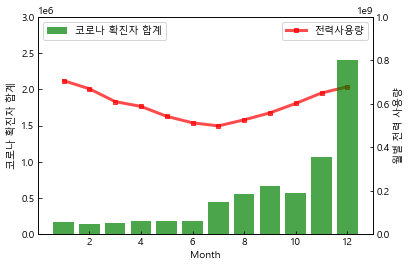

In [41]:
# 가로등
sl_year_group = sl2.groupby(sl['월'])['전력 사용량'].sum()
sl_covid_group = sl2.groupby(sl['월'])['확진자'].sum()

fig, ax1 = plt.subplots()
ax1.bar(sl_covid_group.index, sl_covid_group.values, color='green', alpha=0.7, label='코로나 확진자 합계')
ax1.set_ylim(0,3e6)
ax1.set_xlabel('Month')
ax1.set_ylabel('코로나 확진자 합계')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.plot(sl_year_group.index, sl_year_group.values,'-s', color='red', markersize=4, linewidth=3, alpha=0.7, label='전력사용량')
ax2.set_ylim(0, 1e9) 
ax2.set_ylabel('월별 전력 사용량')
ax2.tick_params(axis='both', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
plt.legend(loc='upper right')

plt.show()

No handles with labels found to put in legend.


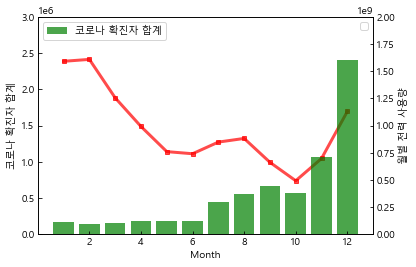

In [42]:
# 심야
dn_year_group = dn2.groupby(dn['월'])['전력 사용량'].sum()
dn_covid_group = dn2.groupby(dn['월'])['확진자'].sum()

fig, ax1 = plt.subplots()
ax1.bar(dn_covid_group.index, dn_covid_group.values, color='green', alpha=0.7, label='코로나 확진자 합계')
ax1.set_ylim(0,3e6)
ax1.set_xlabel('Month')
ax1.set_ylabel('코로나 확진자 합계')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.plot(dn_year_group.index, dn_year_group.values,'-s', color='red', markersize=4, linewidth=3, alpha=0.7)
ax2.set_ylim(0, 2e9) 
ax2.set_ylabel('월별 전력 사용량')
ax2.tick_params(axis='both', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
plt.legend(loc='upper right')

plt.show()

In [43]:
sl['전력 사용량'].value_counts()

1028793.0    2
1892502.0    2
715199.0     2
817225.0     2
914465.0     2
            ..
520518.0     1
544533.0     1
487806.0     1
401998.0     1
2703994.0    1
Name: 전력 사용량, Length: 6281, dtype: int64

In [44]:
# 인천광역시
sl[sl['전력 사용량']>= 3000000.0]['시군구'].unique()

array(['서구', '중구'], dtype=object)

In [45]:
sl['전력 사용량'].max()

3655871.0

In [46]:
dn['전력 사용량'].max()

23191561.0

**기온 영향력 확인**

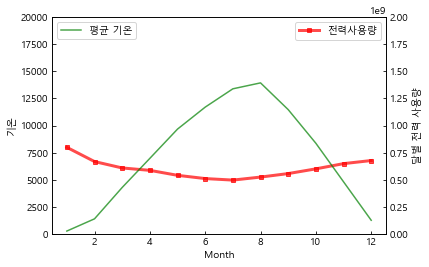

In [47]:
# 가로등
sl_year_group = sl.groupby(sl['월'])['전력 사용량'].sum()
sl_covid_group = sl.groupby(sl['월'])['평균기온'].sum()

fig, ax1 = plt.subplots()
ax1.plot(sl_covid_group.index, sl_covid_group.values, color='green', alpha=0.7, label='평균 기온')
ax1.set_ylim(0,2e4)
ax1.set_xlabel('Month')
ax1.set_ylabel('기온')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.plot(sl_year_group.index, sl_year_group.values,'-s', color='red', markersize=4, linewidth=3, alpha=0.7, label='전력사용량')
ax2.set_ylim(0, 2e9) 
ax2.set_ylabel('달별 전력 사용량')
ax2.tick_params(axis='both', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
plt.legend(loc='upper right')

plt.show()

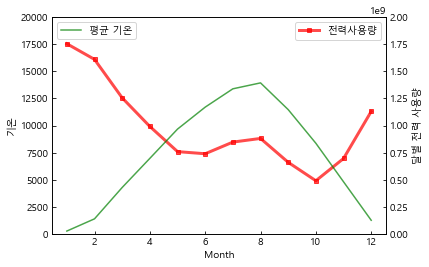

In [48]:
# 심야
dn_year_group = dn.groupby(dn['월'])['전력 사용량'].sum()
dn_covid_group = dn.groupby(dn['월'])['평균기온'].sum()

fig, ax1 = plt.subplots()
ax1.plot(dn_covid_group.index, dn_covid_group.values, color='green', alpha=0.7, label='평균 기온')
ax1.set_ylim(0,2e4)
ax1.set_xlabel('Month')
ax1.set_ylabel('기온')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.plot(dn_year_group.index, dn_year_group.values,'-s', color='red', markersize=4, linewidth=3, alpha=0.7, label='전력사용량')
ax2.set_ylim(0, 2e9) 
ax2.set_ylabel('달별 전력 사용량')
ax2.tick_params(axis='both', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
plt.legend(loc='upper right')

plt.show()

**심야 전력 사용량은 기온이 낮으면 전력 사용량이 늘어나며 기온이 높으면 전력 사용량이 줄어드는 그래프를 보이므로 기온과 상관관계가 있다.**

In [49]:
sl_y = sl['전력 사용량']
dn_y = dn['전력 사용량']

<AxesSubplot:>

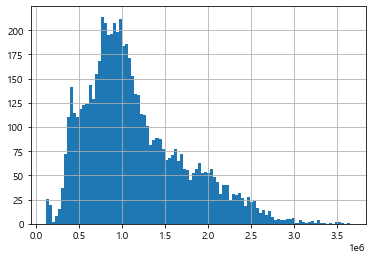

In [50]:
# 가로등 분포
sl_y.hist(bins=100)

In [51]:
log_sl = np.log1p(sl_y+1e-05)

<AxesSubplot:>

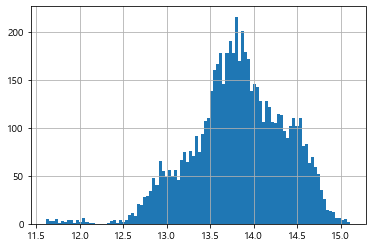

In [52]:
log_sl.hist(bins=100)

<AxesSubplot:>

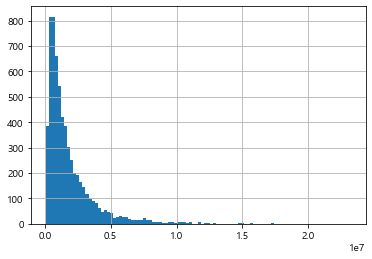

In [53]:
# 심야
dn_y.hist(bins=100)

<AxesSubplot:>

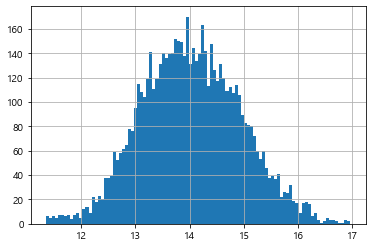

In [54]:
log_dn = np.log1p(dn_y+1e-05)
log_dn.hist(bins=100)

<AxesSubplot:xlabel='년도', ylabel='전력 사용량'>

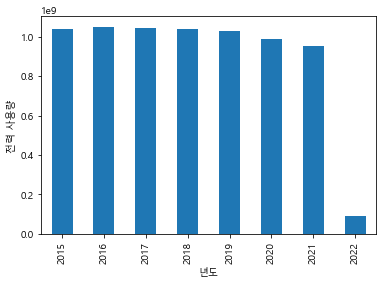

In [55]:
sl.groupby('년도')['전력 사용량'].sum().plot(ylabel='전력 사용량', kind='bar')

In [56]:
# 년도 + 월
df['연월'] = np.zeros(len(df))

for i in range(len(df)):
    df['연월'][i] = str(df['년도'][i])+'-'+str(df['월'][i])

In [57]:
df

,시도,시군구,계약종별,년도,월,전력 사용량,확진자,평균기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,일조율,연월
0,서울특별시,종로구,주택용,2015,1,2.414819e+07,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94,2015-1
1,서울특별시,종로구,일반용,2015,1,1.181337e+08,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94,2015-1
2,서울특별시,종로구,교육용,2015,1,9.619909e+06,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94,2015-1
3,서울특별시,종로구,산업용,2015,1,6.580369e+06,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94,2015-1
4,서울특별시,종로구,농사용,2015,1,2.848000e+03,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94,2015-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43916,울산광역시,울주군,교육용,2022,1,9.139668e+06,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34,2022-1
43917,울산광역시,울주군,산업용,2022,1,1.030417e+09,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34,2022-1
43918,울산광역시,울주군,농사용,2022,1,6.842901e+06,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34,2022-1
43919,울산광역시,울주군,가로등,2022,1,2.703994e+06,2164.0,2.6,1012.6,39,0.9,2.3,235.2,75.34,2022-1


In [58]:
# 가로등
ga = df[df['계약종별']=='가로등']
ga_drop = ga[ga['년도']==2022].index
ga.drop(ga_drop, inplace=True)
ga

,시도,시군구,계약종별,년도,월,전력 사용량,확진자,평균기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,일조율,연월
5,서울특별시,종로구,가로등,2015,1,1146090.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94,2015-1
11,서울특별시,중구,가로등,2015,1,1725615.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94,2015-1
18,서울특별시,용산구,가로등,2015,1,1500780.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94,2015-1
25,서울특별시,성동구,가로등,2015,1,1267279.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94,2015-1
32,서울특별시,동대문구,가로등,2015,1,1216158.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94,2015-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43374,울산광역시,북구,가로등,2021,12,1448701.0,1233.0,4.7,1012.9,49,3.5,2.3,230.4,75.64,2021-12
43381,울산광역시,동구,가로등,2021,12,768695.0,1233.0,4.7,1012.9,49,3.5,2.3,230.4,75.64,2021-12
43388,울산광역시,중구,가로등,2021,12,1238139.0,1233.0,4.7,1012.9,49,3.5,2.3,230.4,75.64,2021-12
43395,울산광역시,남구,가로등,2021,12,1357616.0,1233.0,4.7,1012.9,49,3.5,2.3,230.4,75.64,2021-12


In [59]:
ga.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6216 entries, 5 to 43402
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시도       6216 non-null   object 
 1   시군구      6216 non-null   object 
 2   계약종별     6216 non-null   object 
 3   년도       6216 non-null   int64  
 4   월        6216 non-null   int64  
 5   전력 사용량   6216 non-null   float64
 6   확진자      6216 non-null   float64
 7   평균기온     6216 non-null   float64
 8   평균현지기압   6216 non-null   float64
 9   평균상대습도   6216 non-null   int64  
 10  월합강수량    6216 non-null   float64
 11  평균풍속     6216 non-null   float64
 12  합계 일조시간  6216 non-null   float64
 13  일조율      6216 non-null   float64
 14  연월       6216 non-null   object 
dtypes: float64(8), int64(3), object(4)
memory usage: 777.0+ KB


In [60]:
ga_year_g = ga.groupby(['연월'])['전력 사용량'].sum()
ga_year_g

연월
2015-1     102088335.0
2015-10     88445093.0
2015-11     96388391.0
2015-12    100108101.0
2015-2      96667331.0
              ...     
2021-5      72782935.0
2021-6      68439103.0
2021-7      67146842.0
2021-8      71134074.0
2021-9      74552333.0
Name: 전력 사용량, Length: 84, dtype: float64

In [61]:
ga_co_g = ga.groupby(['연월'])['확진자'].sum()
ga_co_g

연월
2015-1          0.0
2015-10         0.0
2015-11         0.0
2015-12         0.0
2015-2          0.0
             ...   
2021-5     178919.0
2021-6     176549.0
2021-7     434268.0
2021-8     484796.0
2021-9     620579.0
Name: 확진자, Length: 84, dtype: float64

In [62]:
new_index = []
for i in range(2015, 2022):
    for j in range(1,13):
        new_index.append(f'{i}-{j}')
ga_year = ga_year_g.reindex(new_index)
ga_year

연월
2015-1     102088335.0
2015-2      96667331.0
2015-3      87556861.0
2015-4      84125965.0
2015-5      78057492.0
              ...     
2021-8      71134074.0
2021-9      74552333.0
2021-10     80198373.0
2021-11     86238254.0
2021-12     89570406.0
Name: 전력 사용량, Length: 84, dtype: float64

In [63]:
new_index = []
for i in range(2015, 2022):
    for j in range(1,13):
        new_index.append(f'{i}-{j}')
ga_co = ga_co_g.reindex(new_index)
ga_co

연월
2015-1           0.0
2015-2           0.0
2015-3           0.0
2015-4           0.0
2015-5           0.0
             ...    
2021-8      484796.0
2021-9      620579.0
2021-10     551494.0
2021-11     982446.0
2021-12    2102379.0
Name: 확진자, Length: 84, dtype: float64

In [64]:
ga1 = pd.DataFrame(ga_year)

In [65]:
ga2 = pd.DataFrame(ga_co)

In [66]:
ga = pd.merge(ga1, ga2, on='연월')
ga

,전력 사용량,확진자
연월,,
2015-1,102088335.0,0.0
2015-2,96667331.0,0.0
2015-3,87556861.0,0.0
2015-4,84125965.0,0.0
2015-5,78057492.0,0.0
...,...,...
2021-8,71134074.0,484796.0
2021-9,74552333.0,620579.0
2021-10,80198373.0,551494.0


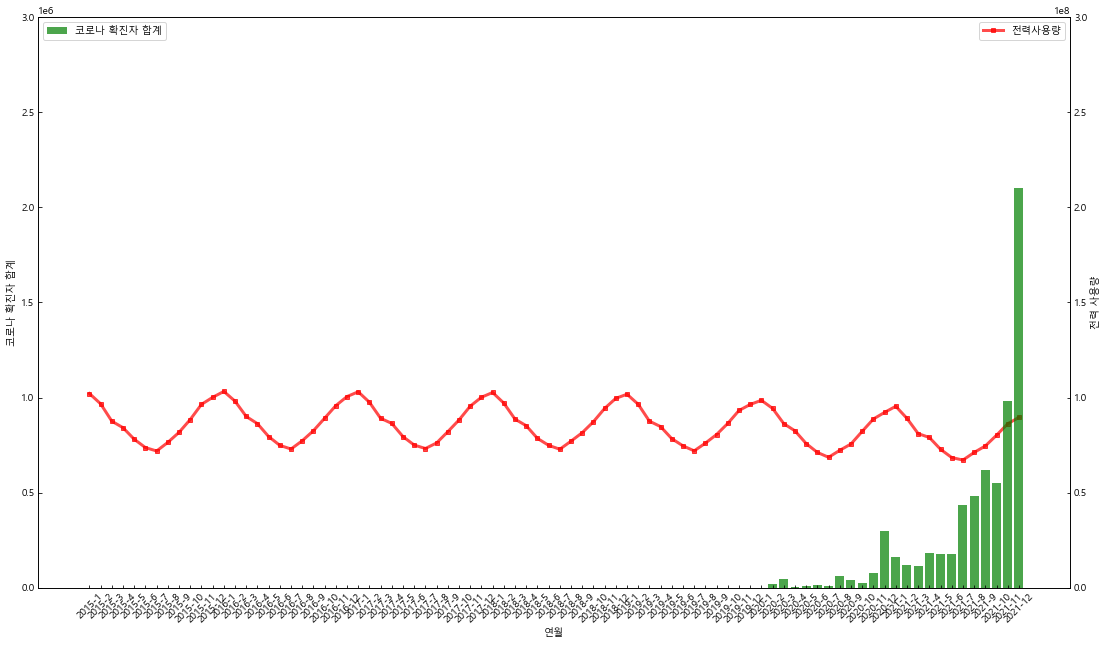

In [67]:
# 가로등

sl_year_group = ga['전력 사용량']
sl_covid_group = ga['확진자']

fig, ax1 = plt.subplots()
ax1.bar(sl_covid_group.index, sl_covid_group.values, color='green', alpha=0.7, label='코로나 확진자 합계')
plt.xticks(rotation=45)
ax1.set_ylim(0,3e6)
ax1.set_xlabel('연월')
ax1.set_ylabel('코로나 확진자 합계')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.plot(sl_year_group.index, sl_year_group.values,'-s', color='red', markersize=4, linewidth=3, alpha=0.7, label='전력사용량')
ax2.set_ylim(0, 3e8) 
ax2.set_ylabel('전력 사용량')
ax2.tick_params(axis='both', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
plt.legend(loc='upper right')
fig = matplotlib.pyplot.gcf() 
fig.set_size_inches(18.5, 10.5)

plt.show()

In [72]:
# 심야
sim = df[df['계약종별']=='심 야']
sim_drop = sim[sim['년도']==2022].index
sim.drop(sim_drop, inplace=True)
sim

,시도,시군구,계약종별,년도,월,전력 사용량,확진자,평균기온,평균현지기압,평균상대습도,월합강수량,평균풍속,합계 일조시간,일조율,연월
6,서울특별시,종로구,심 야,2015,1,4822017.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94,2015-1
12,서울특별시,중구,심 야,2015,1,1197573.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94,2015-1
19,서울특별시,용산구,심 야,2015,1,989022.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94,2015-1
26,서울특별시,성동구,심 야,2015,1,813210.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94,2015-1
33,서울특별시,동대문구,심 야,2015,1,1307186.0,0.0,-0.9,1013.8,56,11.3,2.6,193.3,62.94,2015-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43375,울산광역시,북구,심 야,2021,12,1007522.0,1233.0,4.7,1012.9,49,3.5,2.3,230.4,75.64,2021-12
43382,울산광역시,동구,심 야,2021,12,423041.0,1233.0,4.7,1012.9,49,3.5,2.3,230.4,75.64,2021-12
43389,울산광역시,중구,심 야,2021,12,710416.0,1233.0,4.7,1012.9,49,3.5,2.3,230.4,75.64,2021-12
43396,울산광역시,남구,심 야,2021,12,2141584.0,1233.0,4.7,1012.9,49,3.5,2.3,230.4,75.64,2021-12


In [73]:
sim_year_g = sim.groupby(['연월'])['전력 사용량'].sum()
sim_co_g = sim.groupby(['연월'])['확진자'].sum()

In [74]:
new_index = []
for i in range(2015, 2022):
    for j in range(1,13):
        new_index.append(f'{i}-{j}')
sim_year = sim_year_g.reindex(new_index)
sim_co = sim_co_g.reindex(new_index)

In [77]:
sim1 = pd.DataFrame(sim_year)

In [78]:
sim2 = pd.DataFrame(sim_co)

In [79]:
sim = pd.merge(sim1, sim2, on='연월')
sim

,전력 사용량,확진자
연월,,
2015-1,302280257.0,0.0
2015-2,283721013.0,0.0
2015-3,233471202.0,0.0
2015-4,186660028.0,0.0
2015-5,132420471.0,0.0
...,...,...
2021-8,114280069.0,484796.0
2021-9,89149665.0,620579.0
2021-10,62879937.0,551494.0


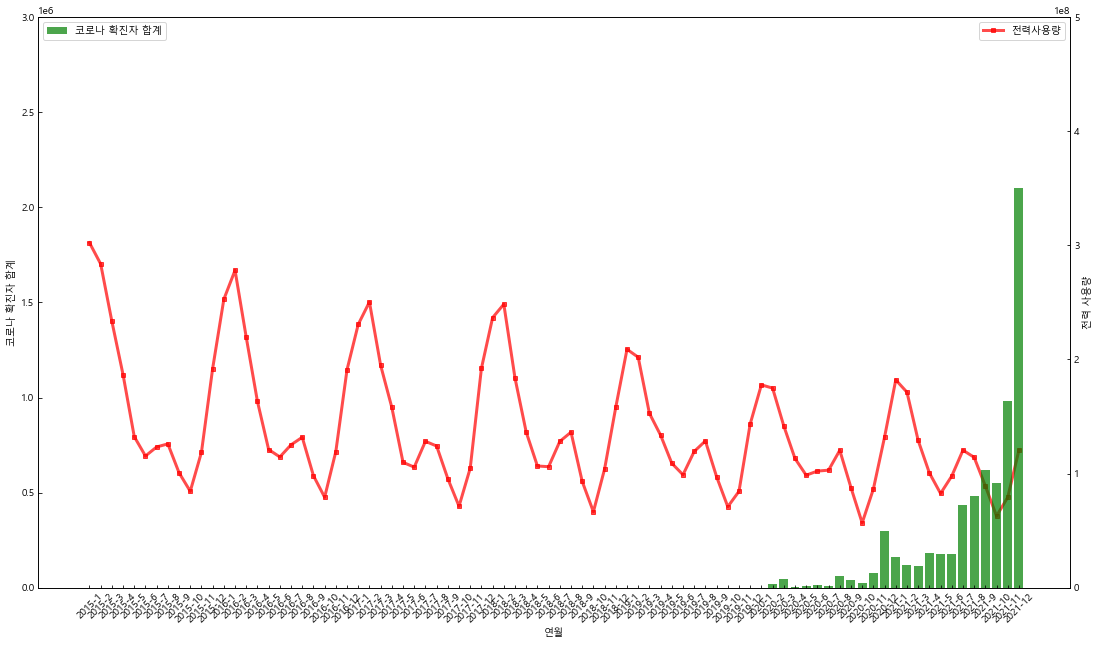

In [81]:
# 심야

sl_year_group = sim['전력 사용량']
sl_covid_group = sim['확진자']

fig, ax1 = plt.subplots()
ax1.bar(sl_covid_group.index, sl_covid_group.values, color='green', alpha=0.7, label='코로나 확진자 합계')
plt.xticks(rotation=45)
ax1.set_ylim(0,3e6)
ax1.set_xlabel('연월')
ax1.set_ylabel('코로나 확진자 합계')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.plot(sl_year_group.index, sl_year_group.values,'-s', color='red', markersize=4, linewidth=3, alpha=0.7, label='전력사용량')
ax2.set_ylim(0, 5e8) 
ax2.set_ylabel('전력 사용량')
ax2.tick_params(axis='both', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

ax1.legend(loc='upper left')
plt.legend(loc='upper right')
fig = matplotlib.pyplot.gcf() 
fig.set_size_inches(18.5, 10.5)

plt.show()

In [83]:
elec_farm = sl # data = 교육용 데이터 이름으로 넣어주세요~

elec_farm = elec_farm.reset_index(drop=True)
elec_farm

# 년도 + 월
elec_farm['연월'] = np.zeros(len(elec_farm))

for i in range(len(elec_farm)):
    elec_farm['연월'][i] = str(elec_farm['년도'][i])+'-'+str(elec_farm['월'][i])

industrial_year_group = elec_farm.groupby(elec_farm['연월'])['전력 사용량'].sum()
industrial_covid_group = elec_farm.groupby(elec_farm['연월'])['확진자'].sum()

new_index = []
for i in range(2015, 2022):
    for j in range(1,13):
        new_index.append(f'{i}-{j}')
        
industrial_year_group = industrial_year_group.reindex(new_index)
industrial_covid_group = industrial_covid_group.reindex(new_index)
display(industrial_year_group)
display(industrial_covid_group)


연월
2015-1     102088335.0
2015-2      96667331.0
2015-3      87556861.0
2015-4      84125965.0
2015-5      78057492.0
              ...     
2021-8      71134074.0
2021-9      74552333.0
2021-10     80198373.0
2021-11     86238254.0
2021-12     89570406.0
Name: 전력 사용량, Length: 84, dtype: float64

연월
2015-1           0.0
2015-2           0.0
2015-3           0.0
2015-4           0.0
2015-5           0.0
             ...    
2021-8      484796.0
2021-9      620579.0
2021-10     551494.0
2021-11     982446.0
2021-12    2102379.0
Name: 확진자, Length: 84, dtype: float64

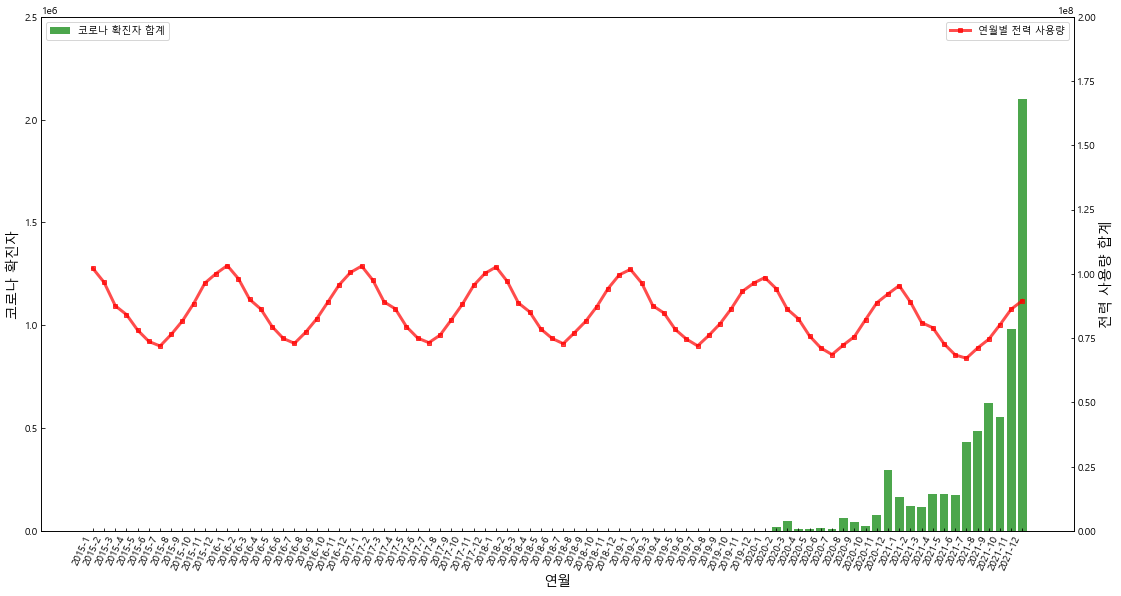

In [85]:
fig, ax1 = plt.subplots()

ax1.bar(industrial_covid_group.index, industrial_covid_group.values, color='green', alpha=0.7, label='코로나 확진자 합계')
ax1.set_ylim(0,2.5e6)
ax1.set_xlabel('연월', fontsize=14)
ax1.set_ylabel('코로나 확진자', fontsize=14)
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.plot(industrial_year_group.index, industrial_year_group.values,'-s', color='red', markersize=4, linewidth=3, alpha=0.7, label='연월별 전력 사용량')
ax2.set_ylim(0,2e8)
ax2.set_ylabel('전력 사용량 합계', fontsize=14)
ax2.tick_params(axis='both', direction='in')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
# plt.title('코로나 확진자 수와 연월별 (교육용)전력 사용량', fontsize=14)  
fig.autofmt_xdate(rotation=65)
fig.set_size_inches(18.5, 10.5)